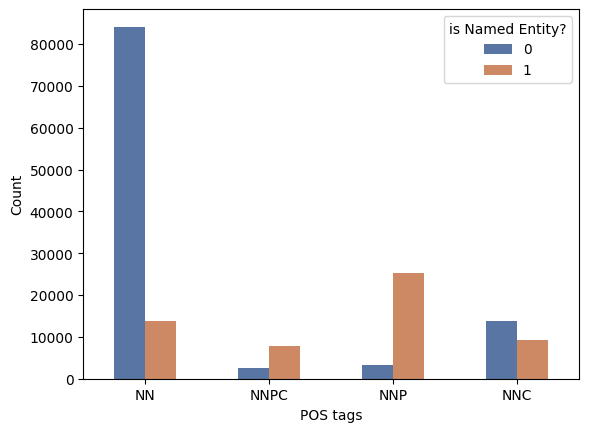

In [10]:
from collections import defaultdict
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import csv
file = open("hi_train_sents.csv", "r")
data = list(csv.reader(file, delimiter=","))
file.close()

pos_map = {'NN':[0,0], 'NNPC':[0,0], 'NNP':[0,0], 'NNC':[0,0]}

for i in range(len(data)):
    sent = data[i]
    for idx in range(len(sent)):
        tok, ner, pos = sent[idx].split(', ')
        pos = pos[1:-2]
        if pos[0:2] != 'NN':
            continue
        if ner == '0':
            pos_map[pos][0]+=1
        else:
            pos_map[pos][1]+=1

df = pd.DataFrame(pos_map)
df = df.transpose()
df.plot(kind='bar',rot=0,color={0: '#5975A4', 1: '#CC8963'})
plt.xlabel("POS tags")
plt.ylabel("Count")
plt.legend(title='is Named Entity?')
plt.show()
